In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import random
np.random.seed(218)
random.seed(218)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df['FamilySize'] = df.Parch + df.SibSp + 1
df.Embarked.replace(['S', 'C', 'Q'], [0, 1, 2]).median()
e_median = 'S'
df.Embarked = df.Embarked.fillna(e_median)
df.Cabin = np.array(['Unknown' if pd.isnull(x) else x[0] for x in df.Cabin.values])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Unknown,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,1


In [5]:
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand=False)
df.Title = df.Title.replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don', 'Dona'], 'Others')
df.Title = df.Title.replace(['Ms', 'Mlle'], 'Miss')
df.Title = df.Title.replace('Mme', 'Mrs')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Unknown,S,1,Others
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Unknown,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,1,Mr


In [6]:
df = df.drop(['Name', 'PassengerId', 'Ticket'], axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,male,22.0,1,0,7.2500,Unknown,S,2,Mr
1,1,1,female,38.0,1,0,71.2833,C,C,2,Mrs
2,1,3,female,26.0,0,0,7.9250,Unknown,S,1,Miss
3,1,1,female,35.0,1,0,53.1000,C,S,2,Mrs
4,0,3,male,35.0,0,0,8.0500,Unknown,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,Unknown,S,1,Others
887,1,1,female,19.0,0,0,30.0000,B,S,1,Miss
888,0,3,female,NaN,1,2,23.4500,Unknown,S,4,Miss
889,1,1,male,26.0,0,0,30.0000,C,C,1,Mr


In [7]:
means = df.groupby('Title').Age.mean()
for title in df.Title.unique():
    df.loc[df.Title == title, 'Age'] = df.loc[df.Title == title, 'Age'].fillna(means[title])

df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,male,22.000000,1,0,7.2500,Unknown,S,2,Mr
1,1,1,female,38.000000,1,0,71.2833,C,C,2,Mrs
2,1,3,female,26.000000,0,0,7.9250,Unknown,S,1,Miss
3,1,1,female,35.000000,1,0,53.1000,C,S,2,Mrs
4,0,3,male,35.000000,0,0,8.0500,Unknown,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,Unknown,S,1,Others
887,1,1,female,19.000000,0,0,30.0000,B,S,1,Miss
888,0,3,female,21.845638,1,2,23.4500,Unknown,S,4,Miss
889,1,1,male,26.000000,0,0,30.0000,C,C,1,Mr


In [8]:
titles = np.sort(df.Title.unique())
cabins = np.sort(df.Cabin.unique())
df.Embarked = df.Embarked.replace(['S', 'Q', 'C'], [0, 1, 2])
df.Sex = df.Sex.replace(['male', 'female'], [0, 1])
df.Title = df.Title.replace(titles, [0, 1, 2, 3, 4])
df.Cabin = df.Cabin.replace(cabins, [1, 2, 3, 4, 5, 6, 7, 8, 0])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Title
0,0,3,0,22.000000,1,0,7.2500,0,0,2,2
1,1,1,1,38.000000,1,0,71.2833,3,2,2,3
2,1,3,1,26.000000,0,0,7.9250,0,0,1,1
3,1,1,1,35.000000,1,0,53.1000,3,0,2,3
4,0,3,0,35.000000,0,0,8.0500,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,0,0,1,4
887,1,1,1,19.000000,0,0,30.0000,2,0,1,1
888,0,3,1,21.845638,1,2,23.4500,0,0,4,1
889,1,1,0,26.000000,0,0,30.0000,3,2,1,2


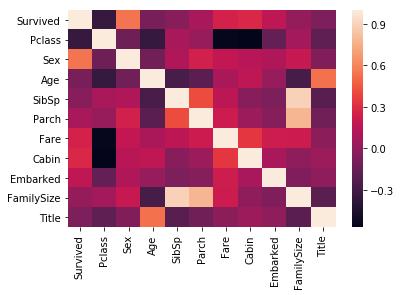

In [9]:
sns.heatmap(df.corr())

In [10]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Title
Survived,1.000000,-0.338481,0.543351,-0.089402,-0.035322,0.081629,0.257307,0.287944,0.167675,0.016639,-0.071174
Pclass,-0.338481,1.000000,-0.131900,-0.343799,0.083081,0.018443,-0.549500,-0.570691,-0.162098,0.065997,-0.181177
Sex,0.543351,-0.131900,1.000000,-0.117476,0.114631,0.245489,0.182333,0.143517,0.108262,0.200988,-0.060299
Age,-0.089402,-0.343799,-0.117476,1.000000,-0.267659,-0.196902,0.091029,0.168929,0.024452,-0.281305,0.532807
SibSp,-0.035322,0.083081,0.114631,-0.267659,1.000000,0.414838,0.159651,-0.031973,-0.068230,0.890712,-0.209813
Parch,0.081629,0.018443,0.245489,-0.196902,0.414838,1.000000,0.216225,0.037621,-0.039798,0.783111,-0.117587
Fare,0.257307,-0.549500,0.182333,0.091029,0.159651,0.216225,1.000000,0.337525,0.224719,0.217138,-0.013273
Cabin,0.287944,-0.570691,0.143517,0.168929,-0.031973,0.037621,0.337525,1.000000,0.080523,-0.003057,0.039618
Embarked,0.167675,-0.162098,0.108262,0.024452,-0.068230,-0.039798,0.224719,0.080523,1.000000,-0.066516,-0.005207
FamilySize,0.016639,0.065997,0.200988,-0.281305,0.890712,0.783111,0.217138,-0.003057,-0.066516,1.000000,-0.202145


In [11]:
X = df.drop(['Survived', 'Title', 'Fare', 'Age', 'FamilySize'], axis=1)
y = df.Survived
X

,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,3,0,1,0,0,0
1,1,1,1,0,3,2
2,3,1,0,0,0,0
3,1,1,1,0,3,0
4,3,0,0,0,0,0
...,...,...,...,...,...,...
886,2,0,0,0,0,0
887,1,1,0,0,2,0
888,3,1,1,2,0,0
889,1,0,0,0,3,2


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=236)

In [13]:
sc = StandardScaler().fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [14]:
forest = RandomForestClassifier(random_state=236)
gsc = GridSearchCV(forest, param_grid={'n_estimators':[10, 200, 5], 'max_depth': [5, 150, 15], 'min_samples_split': [2, 100, 5]},)
gsc.fit(X_train, y_train)
print(gsc.best_params_)
print(gsc.best_score_)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 150, 'min_samples_split': 100, 'n_estimators': 10}
0.8139825218476904


In [15]:
classifier = RandomForestClassifier(random_state=236, max_depth=150, min_samples_split=150, n_estimators=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=150, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=236,
                       verbose=0, warm_start=False)

In [16]:
y_preds = classifier.predict(X_test)
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

[[48 11]
 [13 18]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        59
           1       0.62      0.58      0.60        31

    accuracy                           0.73        90
   macro avg       0.70      0.70      0.70        90
weighted avg       0.73      0.73      0.73        90



In [17]:
test = pd.read_csv('/kaggle/input/titanic/test.csv').drop(['PassengerId', 'Ticket'], axis=1)

In [18]:
test.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [19]:
test['Title'] = test.Name.str.extract('([A-Za-z]+)\.', expand=False)
test.Title = test.Title.replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don', 'Dona'], 'Others')
test.Title = test.Title.replace(['Ms', 'Mlle'], 'Miss')
test.Title = test.Title.replace('Mme', 'Mrs')
test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S,Mrs
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q,Mr
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S,Mr
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C,Others
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S,Mr
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S,Mr


In [20]:
test['FamilySize'] = test.Parch + test.SibSp + 1
test.Embarked.replace(['S', 'C', 'Q'], [0, 1, 2]).median()
e_median = 'S'
test.Embarked = test.Embarked.fillna(e_median)
test.Cabin = np.array(['Unknown' if pd.isnull(x) else x[0] for x in test.Cabin.values])
test.Fare = test.Fare.fillna(test.Fare.median())
test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Unknown,Q,Mr,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,Unknown,S,Mrs,2
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Unknown,Q,Mr,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,Unknown,S,Mr,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,Unknown,S,Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,Unknown,S,Mr,1
414,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,C,Others,1
415,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,Unknown,S,Mr,1
416,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,Unknown,S,Mr,1


In [21]:
for title in test.Title.unique():
    test.loc[test.Title == title, 'Age'] = test.loc[test.Title == title, 'Age'].fillna(means[title])

test

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,3,"Kelly, Mr. James",male,34.500000,0,0,7.8292,Unknown,Q,Mr,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000000,1,0,7.0000,Unknown,S,Mrs,2
2,2,"Myles, Mr. Thomas Francis",male,62.000000,0,0,9.6875,Unknown,Q,Mr,1
3,3,"Wirz, Mr. Albert",male,27.000000,0,0,8.6625,Unknown,S,Mr,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000000,1,1,12.2875,Unknown,S,Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...
413,3,"Spector, Mr. Woolf",male,32.368090,0,0,8.0500,Unknown,S,Mr,1
414,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,108.9000,C,C,Others,1
415,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,7.2500,Unknown,S,Mr,1
416,3,"Ware, Mr. Frederick",male,32.368090,0,0,8.0500,Unknown,S,Mr,1


In [22]:
test.Cabin.unique()

array(['Unknown', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [23]:
test = test.drop(['Name'], axis=1)
test.Embarked = test.Embarked.replace(['S', 'Q', 'C'], [0, 1, 2])
test.Sex = test.Sex.replace(['male', 'female'], [0, 1])
test.Title = test.Title.replace(titles, [0, 1, 2, 3, 4])
test.Cabin = test.Cabin.replace(cabins, [1, 2, 3, 4, 5, 6, 7, 8, 0])
test = test.drop(['Title', 'Fare', 'Age', 'FamilySize'], axis=1)
test

,Pclass,Sex,SibSp,Parch,Cabin,Embarked
0,3,0,0,0,0,1
1,3,1,1,0,0,0
2,2,0,0,0,0,1
3,3,0,0,0,0,0
4,3,1,1,1,0,0
...,...,...,...,...,...,...
413,3,0,0,0,0,0
414,1,1,0,0,3,2
415,3,0,0,0,0,0
416,3,0,0,0,0,0


In [24]:
test = sc.transform(test)

In [25]:
pred = classifier.predict(test)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [26]:
result = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
result.Survived=pred
result.to_csv('result.csv', index=False)